In [1]:
import os

print(os.path.abspath(os.curdir))

d:\Data Kuliah\Semester 6\Log Abstraction\log-abstraction-dev\notebooks


In [2]:
import os
os.chdir("..")

In [3]:
print(os.path.abspath(os.curdir))

d:\Data Kuliah\Semester 6\Log Abstraction\log-abstraction-dev


### t-SNE

In [15]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import os

drone_sbert = SentenceTransformer("swardiantara/drone-sbert")

dataset = pd.read_excel(os.path.join('dataset', 'cluster_label.xlsx')).sort_values(by='message').reset_index()
print(dataset)
labels = dataset['cluster_id'].to_list()
drone_embeddings = drone_sbert.encode(dataset['message'].to_list())
# Assuming 'data' is your dataset and 'labels' are the cluster labels
tsne = TSNE(n_components=2, random_state=0)
drone_2d = tsne.fit_transform(drone_embeddings)

tsne_3 = TSNE(n_components=3, random_state=0)
drone_3d = tsne_3.fit_transform(drone_embeddings)

c:\Users\sward\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


     index                                            message  cluster_id
0       38  A passenger aircraft is approaching. Descend a...           9
1       39   A passenger aircraft is nearby. Fly with caution           9
2      421                       AE Locked. Metering disabled         199
3      352                              APAS has been enabled         135
4      444                          API Automatic Return Home         220
..     ...                                                ...         ...
579    529  Your aircraft is at the boundary of an Altitud...         286
580    530  Your aircraft is at the boundary of an Authori...         287
581     65  Your aircraft is flying in an Altitude Zone (n...          15
582    313  Your palm is too close to the aircraft. Please...         125
583    580  Your palm is too far away from the aircraft. P...         335

[584 rows x 3 columns]


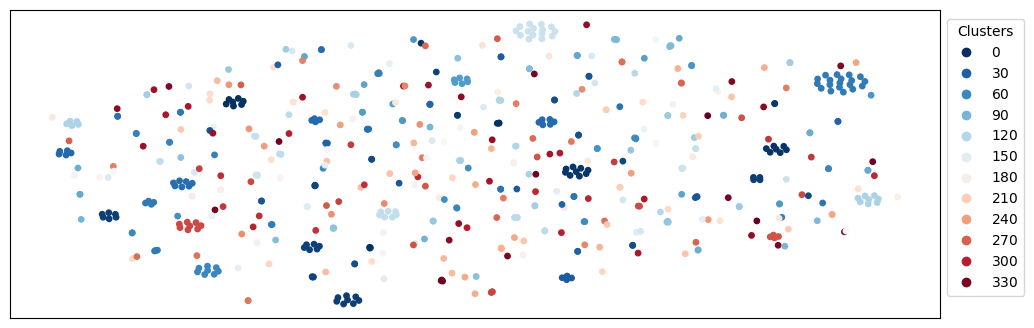

In [18]:
plt.figure(figsize=(12, 4))
scatter = plt.scatter(drone_2d[:, 0], drone_2d[:, 1], c=labels, cmap='RdBu_r', s=15)
# plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.title('t-SNE visualization of clusters by drone-SBERT')
# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 0.05), loc='lower left')
# plt.savefig(os.path.join('visualizations', 'dataviz_drone-sbert-norm.pdf'), bbox_inches='tight')
plt.show()
plt.close()

In [20]:
import plotly.express as px


# Create a DataFrame that includes t-SNE features and the original text labels
# drone_3d_df = pd.DataFrame(drone_3d, columns=['t-SNE 1', 't-SNE 2', 't-SNE 3'])
# drone_3d_df['Cluster'] = labels
# drone_3d_df['Text'] = dataset['message']

# Create a DataFrame that includes t-SNE features and the original text labels
drone_2d_df = pd.DataFrame(drone_2d, columns=['t-SNE1', 't-SNE2'])
drone_2d_df['Cluster'] = labels
drone_2d_df['Text'] = dataset['message']

# Plot with Plotly
fig = px.scatter(drone_2d_df, x='t-SNE1', y='t-SNE2', color='Cluster', hover_data={'Text': True, 't-SNE1': False, 't-SNE2': False})
fig.update_traces(marker=dict(size=5))
fig.update_layout(title='t-SNE Visualization with Original Text Labels')
fig.show()

# Plot with Plotly
# fig = px.scatter_3d(drone_3d_df, x='t-SNE 1', y='t-SNE 2', z='t-SNE 3', color='Cluster', hover_data={'Text': True, 't-SNE 1': False, 't-SNE 2': False, 't-SNE 3': False})
# fig.update_traces(marker=dict(size=5))
# fig.update_layout(title='3D t-SNE Visualization with Original Text Labels')
# fig.show()

# Assuming 'drone_2d' is your 2D data after dimensionality reduction and 'labels' are the cluster labels
# fig = px.scatter(drone_2d, x=0, y=1, color=labels, title='t-SNE visualization of clusters')
# fig.show()

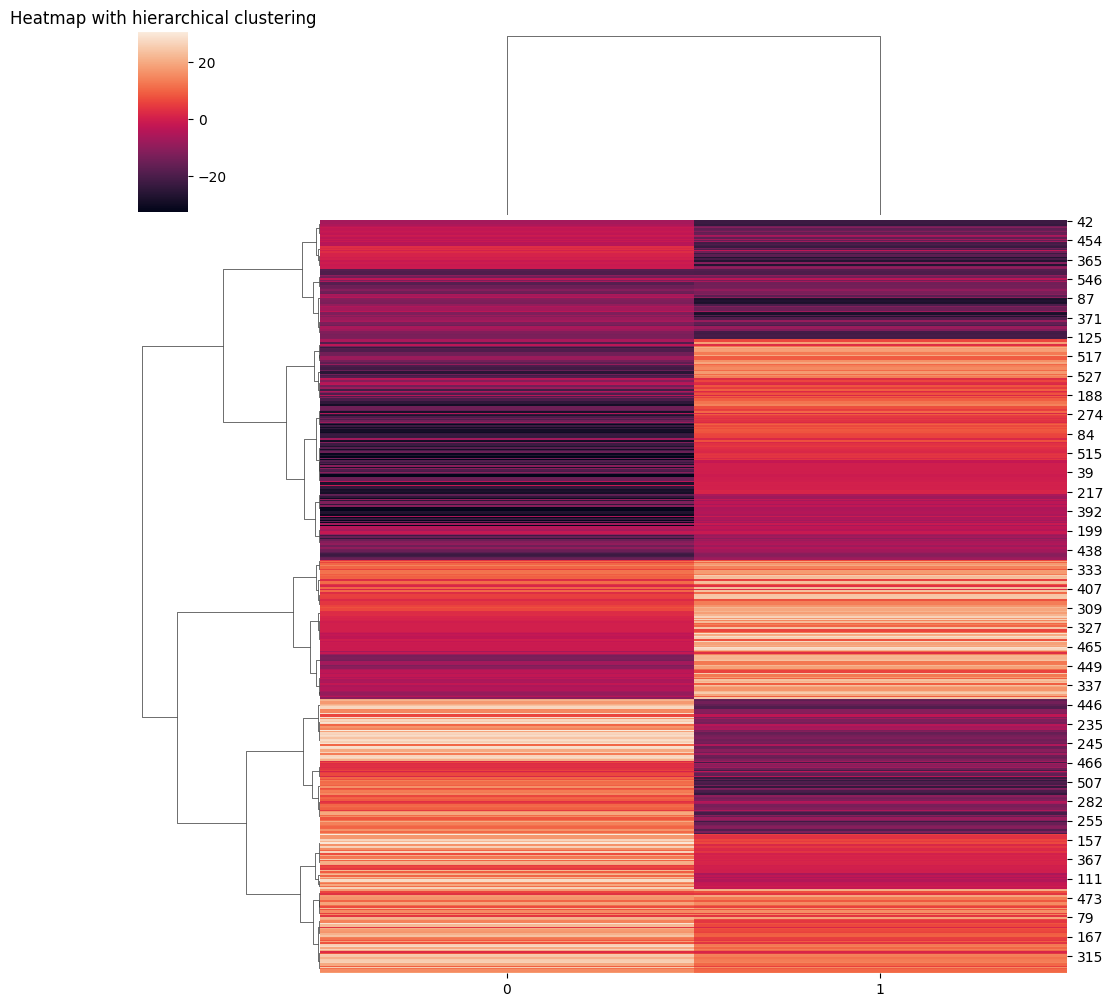

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataset
sns.clustermap(drone_2d, metric="cosine", method="average", cmap="rocket")
plt.title('Heatmap with hierarchical clustering')
plt.show()
plt.close()

In [21]:
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import os

model = SentenceTransformer("all-mpnet-base-v2")

dataset = pd.read_excel(os.path.join('dataset', 'cluster_label.xlsx')).sort_values(by='message')
labels = dataset['cluster_id'].to_list()
data = model.encode(dataset['message'].to_list(), normalize_embeddings=True)
# Assuming 'data' is your dataset and 'labels' are the cluster labels
tsne_sbert = TSNE(n_components=2, random_state=0)
data_2d = tsne_sbert.fit_transform(data)

c:\Users\sward\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning:

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.



ValueError: 'rocket' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

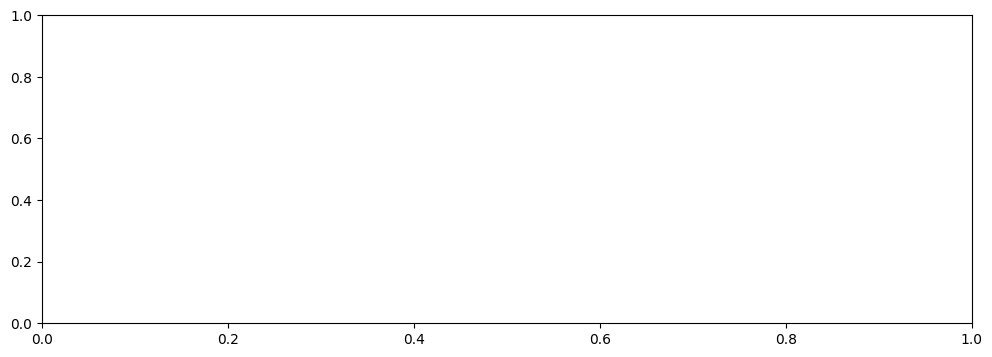

In [22]:
plt.figure(figsize=(12, 4))
scatter = plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='rocket', s=15)
# plt.title('t-SNE visualization of clusters')
# plt.xlabel('t-SNE feature 1')
# plt.ylabel('t-SNE feature 2')
plt.xticks([])
plt.yticks([])
plt.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 0.05), loc='lower left')
plt.savefig(os.path.join('visualizations', 'dataviz_sbert.pdf'), bbox_inches='tight')
plt.show() 
plt.close()

In [12]:
import plotly.express as px

# Create a DataFrame that includes t-SNE features and the original text labels
data_2d_df = pd.DataFrame(data_2d, columns=['tSNE1', 'tSNE2'])
data_2d_df['Cluster'] = labels
data_2d_df['Text'] = dataset['message']

# Plot with Plotly
fig = px.scatter(data_2d_df, x='tSNE1', y='tSNE2', color='Cluster', hover_data={'Text': True, 'tSNE1': False, 'tSNE2': False})
fig.update_traces(marker=dict(size=8))
fig.update_layout(title='t-SNE Visualization with Original Text Labels')
fig.show()

# Assuming 'data_2d' is your 2D data after dimensionality reduction and 'labels' are the cluster labels
fig = px.scatter(data_2d, x=0, y=1, color=labels, title='t-SNE visualization of clusters')
fig.show()

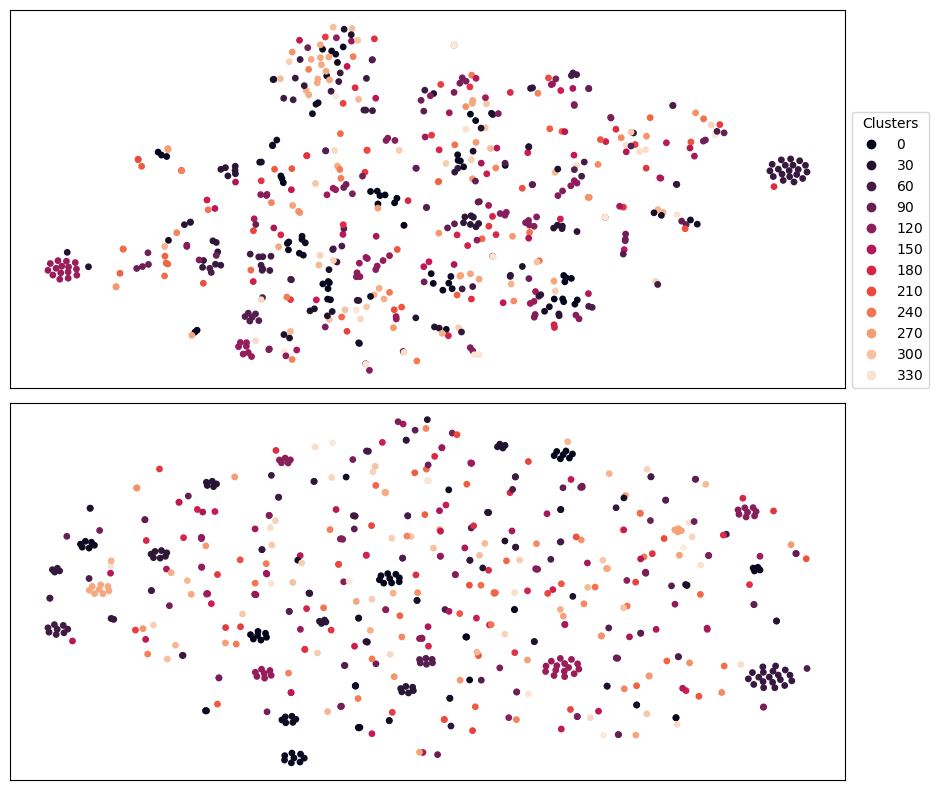

In [54]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Sample data
# drone_2d = tsne.fit_transform(drone_embeddings)
# data_2d = tsne_sbert.fit_transform(data)

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 5])

# First subplot (top row)
ax1 = fig.add_subplot(gs[0, 0])
sc1 = ax1.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='rocket', s=15)

# Second subplot (bottom row)
ax2 = fig.add_subplot(gs[1, 0])
sc2 = ax2.scatter(drone_2d[:, 0], drone_2d[:, 1], c=labels, cmap='rocket', s=15)

# Remove axis ticks and titles
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

# Create a common legend
handles, labels_legend = ax1.get_legend_handles_labels()
ax_legend = fig.add_subplot(gs[:, 0])  # Use the full height for the legend
ax_legend.axis('off')
ax_legend.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 0.5), loc='lower left',)
# *scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left'
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Adjust to make space for the legend
plt.show()
